<a href="https://colab.research.google.com/github/Piyu569/SparkProject02/blob/dev/PySparkPractice2_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 14.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=09b1d60ddfbe61234d69ce9479a20b901e4241f2c8cb3e24845f7cceb8ef8e2e
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [2]:
from pyspark.sql import SparkSession

In [3]:
from pyspark import SparkContext
spark = SparkSession.builder.appName("SportsCar").getOrCreate()
sc = spark.sparkContext

In [4]:
df = spark.read.csv("/content/SportsCarPrice.csv",inferSchema=True , header=True)

In [5]:
from pyspark.storagelevel import StorageLevel
df.persist(StorageLevel.MEMORY_AND_DISK)

DataFrame[Car Make: string, Car Model: string, Year: int, Engine Size (L): string, Horsepower: string, Torque (lb-ft): string, 0-60 MPH Time (seconds): string, Price (in USD): string]

In [6]:
df.printSchema()

root
 |-- Car Make: string (nullable = true)
 |-- Car Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Engine Size (L): string (nullable = true)
 |-- Horsepower: string (nullable = true)
 |-- Torque (lb-ft): string (nullable = true)
 |-- 0-60 MPH Time (seconds): string (nullable = true)
 |-- Price (in USD): string (nullable = true)



In [7]:
df.show()

+-------------+--------------------+----+---------------+----------+--------------+-----------------------+--------------+
|     Car Make|           Car Model|Year|Engine Size (L)|Horsepower|Torque (lb-ft)|0-60 MPH Time (seconds)|Price (in USD)|
+-------------+--------------------+----+---------------+----------+--------------+-----------------------+--------------+
|      Porsche|                 911|2022|              3|       379|           331|                      4|       101,200|
|  Lamborghini|             Huracan|2021|            5.2|       630|           443|                    2.8|       274,390|
|      Ferrari|             488 GTB|2022|            3.9|       661|           561|                      3|       333,750|
|         Audi|                  R8|2022|            5.2|       562|           406|                    3.2|       142,700|
|      McLaren|                720S|2021|              4|       710|           568|                    2.7|       298,000|
|          BMW| 

In [8]:
display(df)

DataFrame[Car Make: string, Car Model: string, Year: int, Engine Size (L): string, Horsepower: string, Torque (lb-ft): string, 0-60 MPH Time (seconds): string, Price (in USD): string]

In [9]:
df.rdd.getStorageLevel()

StorageLevel(False, False, False, False, 1)

In [10]:
df.rdd.getNumPartitions()

1

In [11]:
df.show()

+-------------+--------------------+----+---------------+----------+--------------+-----------------------+--------------+
|     Car Make|           Car Model|Year|Engine Size (L)|Horsepower|Torque (lb-ft)|0-60 MPH Time (seconds)|Price (in USD)|
+-------------+--------------------+----+---------------+----------+--------------+-----------------------+--------------+
|      Porsche|                 911|2022|              3|       379|           331|                      4|       101,200|
|  Lamborghini|             Huracan|2021|            5.2|       630|           443|                    2.8|       274,390|
|      Ferrari|             488 GTB|2022|            3.9|       661|           561|                      3|       333,750|
|         Audi|                  R8|2022|            5.2|       562|           406|                    3.2|       142,700|
|      McLaren|                720S|2021|              4|       710|           568|                    2.7|       298,000|
|          BMW| 

In [12]:
from pyspark.sql.functions import regexp_replace,col,max
fastest_car = (df.withColumn("Horsepower",regexp_replace(col("Horsepower"),"","").cast("integer"))
                 .groupBy("Car Make","Car Model","Engine Size (L)")
                 .agg(max("Horsepower").alias("Fastest_car"))
                 .select("*")
                 .orderBy(col("Fastest_car").desc_nulls_last())
                 .show(20,False)
)

+-----------+-----------------------+--------------------+-----------+
|Car Make   |Car Model              |Engine Size (L)     |Fastest_car|
+-----------+-----------------------+--------------------+-----------+
|Lotus      |Evija                  |Electric            |2000       |
|Lotus      |Evija                  |N/A                 |1972       |
|Lotus      |Evija                  |Electric Motor      |1972       |
|Rimac      |Nevera                 |Electric            |1914       |
|Rimac      |C_Two                  |N/A                 |1914       |
|Rimac      |C_Two                  |Electric            |1914       |
|Rimac      |Nevera                 |Electric Motor      |1888       |
|Pininfarina|Battista               |Electric            |1874       |
|Koenigsegg |Jesko Absolut          |5                   |1600       |
|Koenigsegg |Jesko                  |5                   |1600       |
|Bugatti    |Chiron Super Sport 300+|8                   |1578       |
|Bugat

In [13]:
from pyspark.sql.functions import col,regexp_replace
costly_car = (
               df.withColumn("Price (in USD)",regexp_replace(col("Price (in USD)"),",","").cast("integer"))
                 .groupBy("Car Make")
                 .max("Price (in USD)")
                 .sort("max(Price (in USD))",ascending= False)
                 .show()
)

+-------------+-------------------+
|     Car Make|max(Price (in USD))|
+-------------+-------------------+
|      Bugatti|            5200000|
|  Lamborghini|            3600000|
|       Pagani|            3500000|
|     W Motors|            3400000|
|   Koenigsegg|            3000000|
|        Lotus|            2800000|
|  Pininfarina|            2500000|
|        Rimac|            2400000|
|      McLaren|            2300000|
|      Porsche|            1800000|
|       Shelby|            1000000|
|      Ferrari|             625000|
|         Ford|             500000|
|  Rolls-Royce|             346300|
|Mercedes-Benz|             335000|
| Mercedes-AMG|             330000|
| Aston Martin|             330000|
|      Bentley|             300000|
|       Ultima|             220000|
|       Nissan|             212000|
+-------------+-------------------+
only showing top 20 rows



In [14]:
from pyspark.sql.functions import col 
filter_on_horse_Engine_Size =  (
                                 df.filter((col("Horsepower")>"500") & (col("Engine Size (L)") >= "4"))
).show()

+-------------+--------------------+----+---------------+----------+--------------+-----------------------+--------------+
|     Car Make|           Car Model|Year|Engine Size (L)|Horsepower|Torque (lb-ft)|0-60 MPH Time (seconds)|Price (in USD)|
+-------------+--------------------+----+---------------+----------+--------------+-----------------------+--------------+
|  Lamborghini|             Huracan|2021|            5.2|       630|           443|                    2.8|       274,390|
|         Audi|                  R8|2022|            5.2|       562|           406|                    3.2|       142,700|
|      McLaren|                720S|2021|              4|       710|           568|                    2.7|       298,000|
|          BMW|                  M8|2022|            4.4|       617|           553|                    3.1|       130,000|
|Mercedes-Benz|              AMG GT|2021|              4|       523|           494|                    3.8|       118,500|
|         Ford|M

# New 
**ACTIONS IN PYSPARK RDD**

In [15]:
collect_rdd = sc.parallelize([1,2,3,4,5])
print(collect_rdd.collect())
collect_rdd.getNumPartitions()


[1, 2, 3, 4, 5]


2

In [16]:
count_rdd = sc.parallelize([1,2,3,4,5,5,6,7,8,9],numSlices = 8)
print(count_rdd.count())
count_rdd.getNumPartitions()

10


8

In [17]:
first_rdd = sc.parallelize([1,2,3,4,5,6,7,8,9,10])
print(first_rdd.first())

1


In [18]:
take_rdd = sc.parallelize([1,2,3,4,5])
print(take_rdd.take(3))

[1, 2, 3]


In [19]:
reduce_rdd = sc.parallelize([1,3,4,6])
print(reduce_rdd.reduce(lambda x, y : x + y))

14


**TRANSFORMATION IN PYSPARK WITH RDD**

# .map()
 As the name suggests, the .map() transformation maps a value to the elements of an RDD. The .map() transformation takes in an anonymous function and applies this function to each of the elements in the RDD. For example, If we want to add 10 to each of the elements present in RDD, the .map() transformation would come in handy. This operation saves time and goes with the DRY policy. Let’s understand this with an

In [20]:
my_rdd = sc.parallelize([1,2,3,4])
print(my_rdd.map(lambda x: x+ 10).collect())

[11, 12, 13, 14]


# **.filter()**
A .filter() transformation is an operation in PySpark for filtering elements from a PySpark RDD. The .filter() transformation takes in an anonymous function with a condition. Again, since it’s a transformation, it returns an RDD having elements that had passed the given condition. For example, we want to return only an even number of elements, we can use the .filter() transformation.

In [21]:
filter_rdd = sc.parallelize([2, 3, 4, 5, 6, 7])
print(filter_rdd.filter(lambda x: x%2 == 0).collect())

[2, 4, 6]


#.union()
The .union() transformation combines two RDDs and returns the union of the input two RDDs. This can be helpful to extract elements from similar characteristics from two RDDs into a single RDD.

In [22]:
union_inp = sc.parallelize([2,4,5,6,7,8,9])
union_rdd_1 = union_inp.filter(lambda x: x % 2 == 0)
union_rdd_2 = union_inp.filter(lambda x: x % 3 == 0)
print(union_rdd_1.union(union_rdd_2).collect())

[2, 4, 6, 8, 6, 9]


# .flatMap()
 The .flatMap() transformation peforms same as the .map() transformation except the fact that .flatMap() transformation return seperate values for each element from original RDD

In [23]:
flatmap_rdd = sc.parallelize(["Hey there", "This is PySpark RDD Transformations"])
(flatmap_rdd.flatMap(lambda x: x.split(" ")).collect())

['Hey', 'there', 'This', 'is', 'PySpark', 'RDD', 'Transformations']

**PySpark Pair RDD Operations**

In [37]:
marks = [('Rahul', 88), ('Swati', 92), ('Shreya', 83), ('Abhay', 93), ('Rohan', 78)]
sc.parallelize(marks).collect()


[('Rahul', 88), ('Swati', 92), ('Shreya', 83), ('Abhay', 93), ('Rohan', 78)]

#inner join
 

# Supported join types include: 'inner', 'outer', 'full', 'fullouter', 'full_outer', 'leftouter', 'left', 'left_outer', 'rightouter', 'right', 'right_outer', 'leftsemi', 'left_semi', 'semi', 'leftanti', 'left_anti', 'anti', 'cross'.

In [25]:
rdd1 = sc.parallelize([(1,"Apple"),(2,"Banana"),(3,"Orange")])
rdd2 = sc.parallelize([(1,"Red"),(2,"Yellow"),(4,"Green")])



In [26]:


# Inner Join
inner_join = rdd1.join(rdd2)
inner_join.collect()

[(1, ('Apple', 'Red')), (2, ('Banana', 'Yellow'))]

In [27]:
#outer Join
outer_join = rdd1.fullOuterJoin(rdd2)
outer_join.collect()

[(4, (None, 'Green')),
 (1, ('Apple', 'Red')),
 (2, ('Banana', 'Yellow')),
 (3, ('Orange', None))]

In [28]:
#leftOuter
left_outer_join = rdd1.leftOuterJoin(rdd2)
left_outer_join.collect()

[(1, ('Apple', 'Red')), (2, ('Banana', 'Yellow')), (3, ('Orange', None))]

In [29]:
#rightOuter
right_outer_join = rdd1.rightOuterJoin(rdd2)
right_outer_join.collect()

[(4, (None, 'Green')), (1, ('Apple', 'Red')), (2, ('Banana', 'Yellow'))]

In [30]:
#left anti join
left_anti_join = rdd1.subtractByKey(rdd2)
left_anti_join.collect()

[(3, 'Orange')]

In [31]:
#left semi join
left_semi_join = rdd1.subtractByKey(left_anti_join)
left_semi_join_1 = rdd1.subtractByKey(rdd1.subtractByKey(rdd2))
# left_semi_join.collect()
left_semi_join_1.collect()

[(1, 'Apple'), (2, 'Banana')]

In [32]:
#cross join
cartesian_join= rdd1.cartesian(rdd2)
cartesian_join.collect()

[((1, 'Apple'), (1, 'Red')),
 ((1, 'Apple'), (2, 'Yellow')),
 ((1, 'Apple'), (4, 'Green')),
 ((2, 'Banana'), (1, 'Red')),
 ((3, 'Orange'), (1, 'Red')),
 ((2, 'Banana'), (2, 'Yellow')),
 ((2, 'Banana'), (4, 'Green')),
 ((3, 'Orange'), (2, 'Yellow')),
 ((3, 'Orange'), (4, 'Green'))]

**Note**
in rdd's there is no argument how 

# Creating a normal dataframe

In [33]:
from pyspark.sql.types import  StructType,StructField ,IntegerType,StringType

schema = StructType([
    StructField("id",IntegerType(),True),
    StructField("Name",StringType(),True),
    StructField("Dept",StringType(),True),

])
data = [(1,"Abhitayu","IT"),
        (2,"Saynam","IT"),
        (3,"Payal","HR"),
        (4,"Om","Maketing")]

dataframe = spark.createDataFrame(data,schema = schema)
dataframe.show()

+---+--------+--------+
| id|    Name|    Dept|
+---+--------+--------+
|  1|Abhitayu|      IT|
|  2|  Saynam|      IT|
|  3|   Payal|      HR|
|  4|      Om|Maketing|
+---+--------+--------+



In [34]:

from pyspark.sql.types import DoubleType,LongType,IntegerType,StringType,StructType,StructField
Schema = StructType([
    StructField("id",IntegerType(),True),
    StructField("Project",StringType(),True),
    StructField("revenue_Made_By_employee",LongType(),True),
    StructField("ROI",DoubleType(),True)
])



data = [(1, "Project A", 1000000, 0.5),
        (2, "Project B", 2000000, 0.6),
        (3, "Project C", 3000000, 0.7),
        (4, "Project D", 4000000, 0.8),
        (5, "Project E", 5000000, 0.9)]


dataframe2= spark.createDataFrame(data ,schema = Schema)
dataframe2.show()

+---+---------+------------------------+---+
| id|  Project|revenue_Made_By_employee|ROI|
+---+---------+------------------------+---+
|  1|Project A|                 1000000|0.5|
|  2|Project B|                 2000000|0.6|
|  3|Project C|                 3000000|0.7|
|  4|Project D|                 4000000|0.8|
|  5|Project E|                 5000000|0.9|
+---+---------+------------------------+---+



# How does Apache Spark internally select Join strategies?

#Broadcast join
when the smaller table joins to the bigger  one ,the smaller is so small enough to be fitted into executor of the bigger table, the smaller table replicates itself into executors, where the partitions of the bigger tables are present.
  There are maily two types of the join:
     a)**Broadcast Hash join**: In this case, the driver builds the in-memory  hash DataFrame to distribute it to the executors.
     b)**Broadcast nested loop join:**It is a nested for-loop join. It is very good for non-equi joins or coalescing joins.
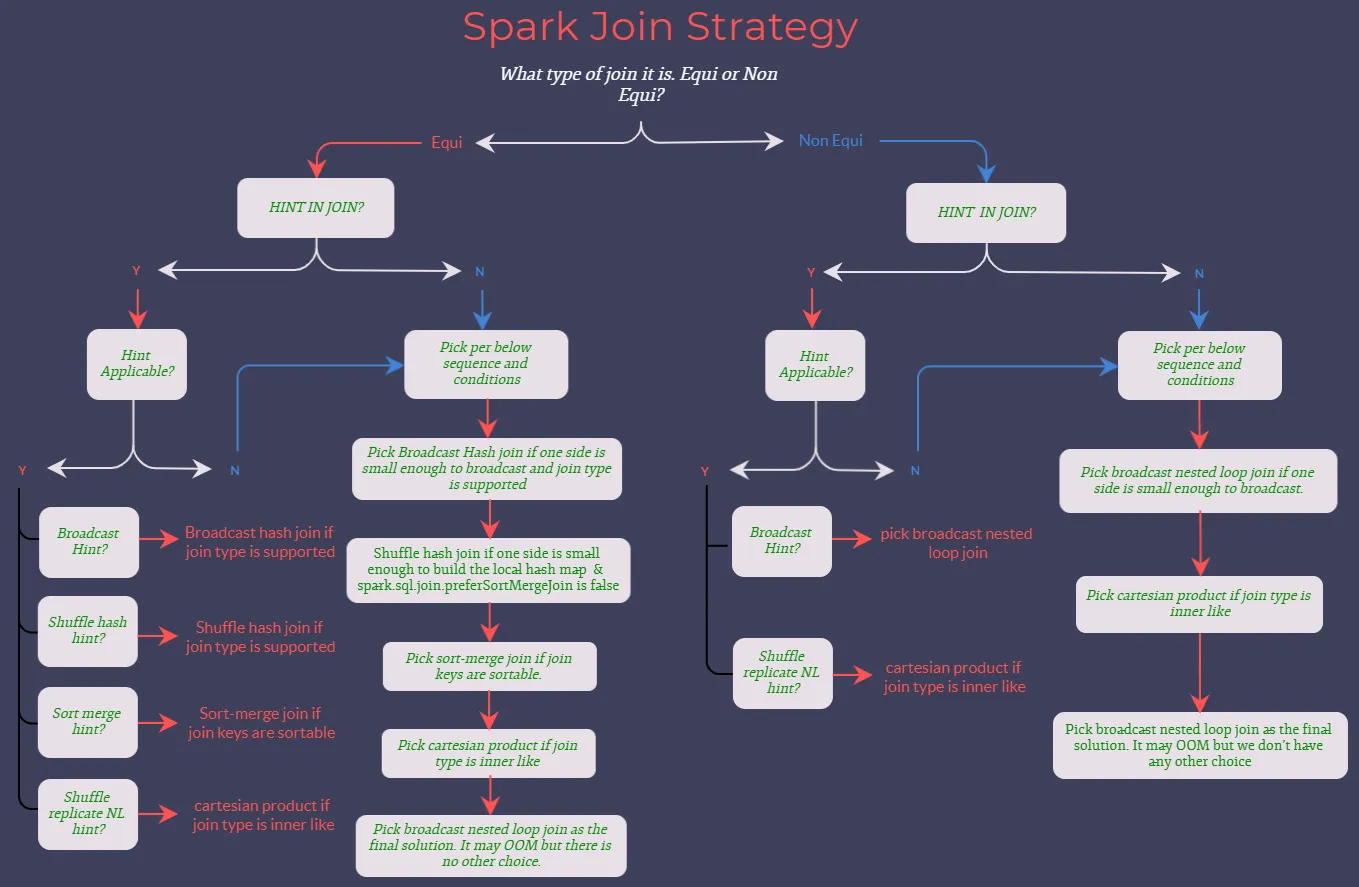



In PySpark, you can perform equi-joins and non-equi-joins using the join() function. The join() function takes two arguments: the first argument is the DataFrame that you want to join, and the second argument is the join condition. The join condition is specified using the on() function for equi-joins and using the where() function for non-equi-joins.

Here's an example of an equi-join in PySpark:


In [39]:
#Equi join


dfff1 = spark.createDataFrame([(1, 'John'), (2, 'Jane'), (3, 'Bob')], ['id', 'name'])
dfff2 = spark.createDataFrame([(1, 'Sales'), (2, 'Marketing'), (3, 'HR')], ['id', 'department'])

result = dfff1.join(dfff2, on='id')

result.show()


+---+----+----------+
| id|name|department|
+---+----+----------+
|  1|John|     Sales|
|  2|Jane| Marketing|
|  3| Bob|        HR|
+---+----+----------+



#non Equi join


In [46]:
from pyspark.sql.functions import col

df1 = spark.createDataFrame([(1, "apple", 0.5), (2, "banana", 0.55), (3, "orange", 0.75)], ["product_id", "product_name", "product_cost"])
df2 = spark.createDataFrame([(1, 0.6), (2, 0.3), (3, 0.8)], ["product_id", "sale_price"])

result1 = df1.join(df2, on="product_id").where(col("sale_price") > col("product_cost"))

result1.show()



+----------+------------+------------+----------+
|product_id|product_name|product_cost|sale_price|
+----------+------------+------------+----------+
|         1|       apple|         0.5|       0.6|
|         3|      orange|        0.75|       0.8|
+----------+------------+------------+----------+



In [38]:
1#BroadHashJoin
from pyspark.sql.functions import broadcast

spark.conf.set("spark.sql.autoBrodcastJoinThreshold",10485760)

broadcast_join = dataframe.join(broadcast(dataframe2), "id" ,"inner")
broadcast_join.show()

+---+--------+--------+---------+------------------------+---+
| id|    Name|    Dept|  Project|revenue_Made_By_employee|ROI|
+---+--------+--------+---------+------------------------+---+
|  1|Abhitayu|      IT|Project A|                 1000000|0.5|
|  2|  Saynam|      IT|Project B|                 2000000|0.6|
|  3|   Payal|      HR|Project C|                 3000000|0.7|
|  4|      Om|Maketing|Project D|                 4000000|0.8|
+---+--------+--------+---------+------------------------+---+



# Shuffle Hash join
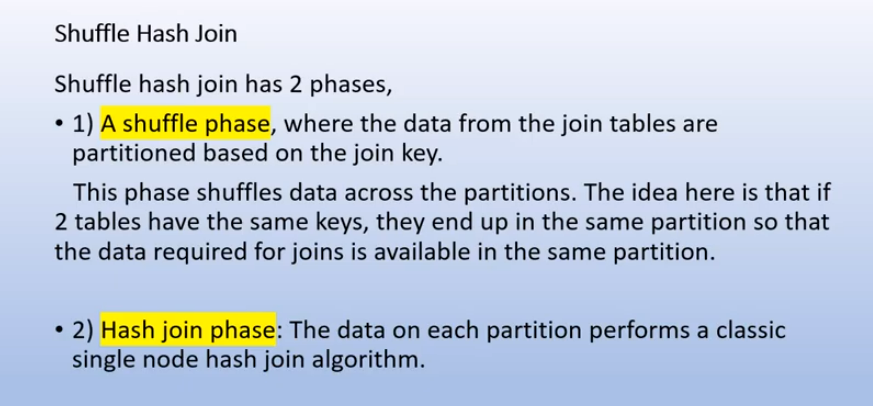


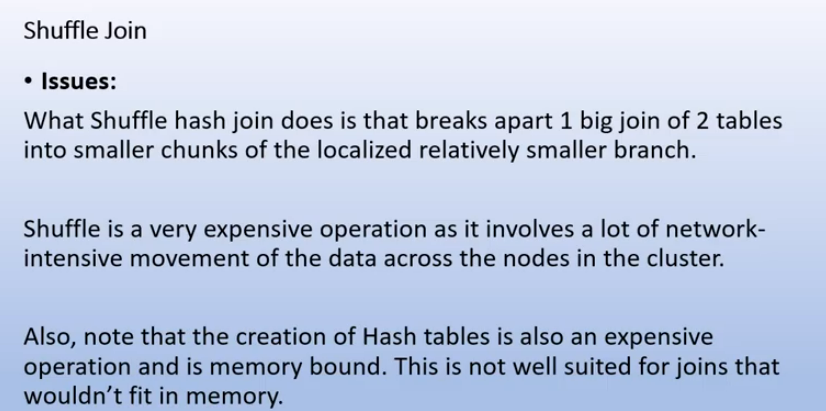

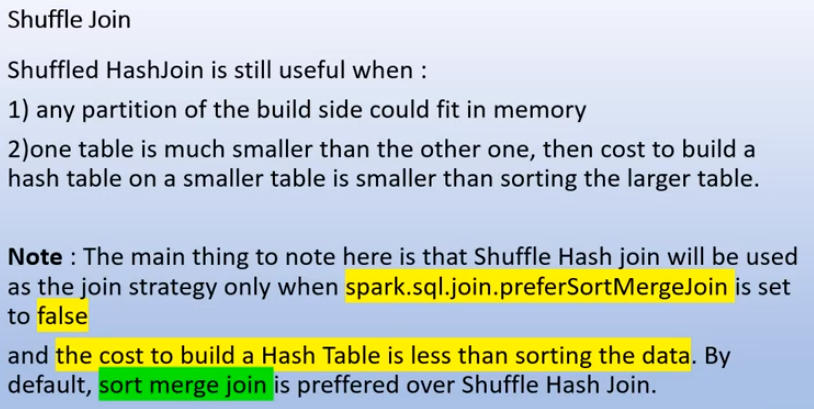

In [58]:
spark.conf.set("spark.sql.perferSortMergeJoin",-1)
spark.conf.set("spark.shuffle.partitions","4")

shuffled_hash_joined_df = dataframe.join(dataframe2, ["id"], "inner").show()


+---+--------+--------+---------+------------------------+---+
| id|    Name|    Dept|  Project|revenue_Made_By_employee|ROI|
+---+--------+--------+---------+------------------------+---+
|  1|Abhitayu|      IT|Project A|                 1000000|0.5|
|  2|  Saynam|      IT|Project B|                 2000000|0.6|
|  3|   Payal|      HR|Project C|                 3000000|0.7|
|  4|      Om|Maketing|Project D|                 4000000|0.8|
+---+--------+--------+---------+------------------------+---+



# Sort Merge Join
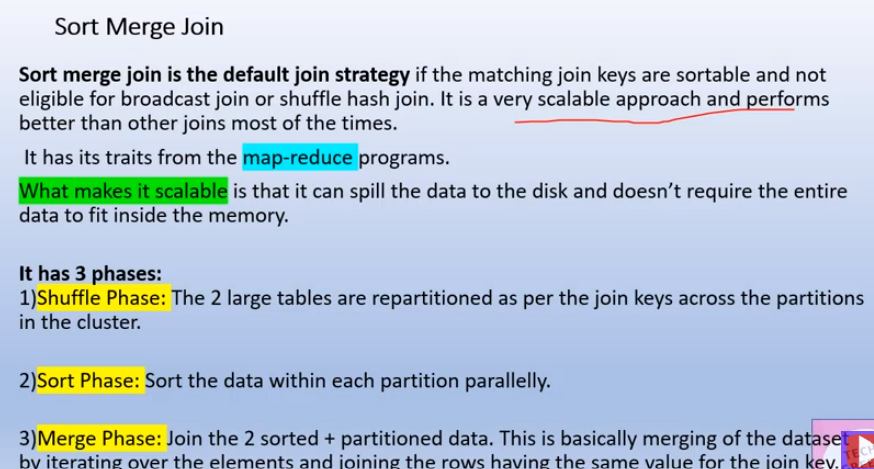

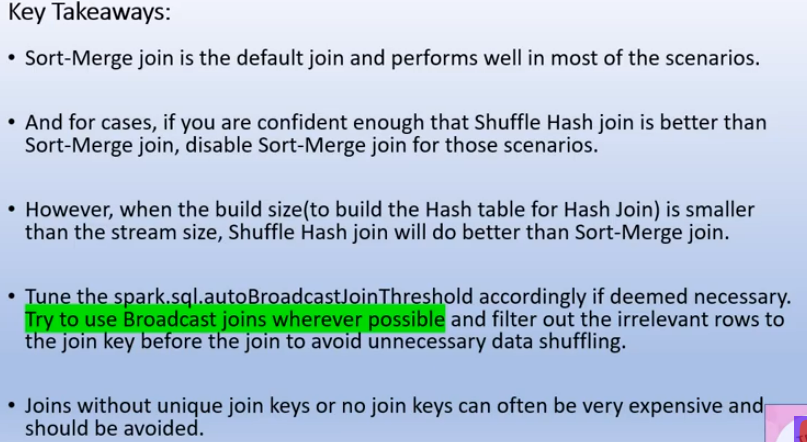




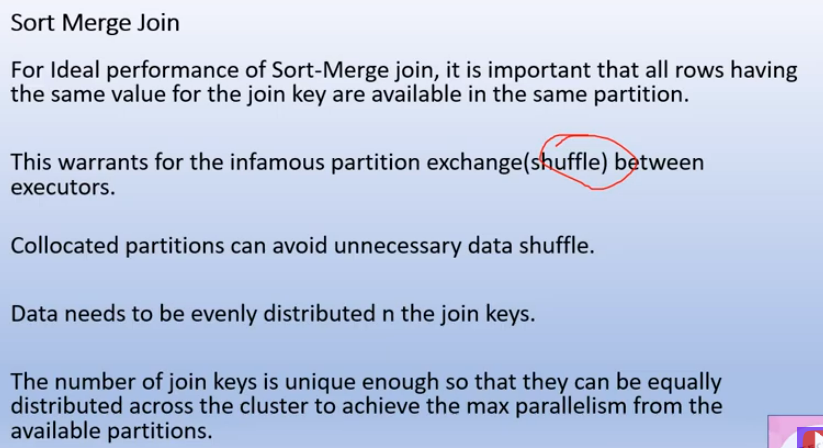







In [63]:
sort_merge_join_df=dataframe.join(dataframe2,on="id",how="inner")
sort_merge_join_df.show()

+---+--------+--------+---------+------------------------+---+
| id|    Name|    Dept|  Project|revenue_Made_By_employee|ROI|
+---+--------+--------+---------+------------------------+---+
|  1|Abhitayu|      IT|Project A|                 1000000|0.5|
|  2|  Saynam|      IT|Project B|                 2000000|0.6|
|  3|   Payal|      HR|Project C|                 3000000|0.7|
|  4|      Om|Maketing|Project D|                 4000000|0.8|
+---+--------+--------+---------+------------------------+---+



# show() vs collect() in pyspark?